In [33]:
%matplotlib notebook

from matplotlib.pylab import *
from numpy import *

<hr style="border-width:4px; border-color:coral"></hr>

# Homework #7- Exact solution

<hr style="border-width:4px; border-color:coral"></hr>

We can find the "best" minimum to the problem of fitting $g(x) = c_0 e^x + c_1 \sin(x) + c_2 \Gamma(x)$ to the function $f(x) = 1/x$.  We can formulate this problem as 

\begin{equation}
\overline{\mathbf c} = \underset{\mathbf c}{\mbox{argmin}} \; F(\mathbf c) 
\end{equation}

where $\mathbf c = (c_0, c_1, c_2)$ and 

\begin{equation}
F(\mathbf c)  = \int_a^b (f(x) - g(x))^2 \; dx
\end{equation}

The minimizaton problem can then be defined in terms of a vector 

\begin{equation}
\mathbf v(x) = 
\begin{bmatrix}e^x \\ \sin(x) \\ \Gamma(x)\end{bmatrix}
\end{equation}

Defining $g(x) = \mathbf c^T\mathbf v(x)$, the gradient of $F(\mathbf c)$ can then be computed as 

\begin{equation}
\nabla F = 2\int_a^b (f(x) - g(x))(-\mathbf v(x)) \; dx
\end{equation}

Setting the gradient equal to 0 results in a linear system for $\mathbf c$, given by 

\begin{equation}
\int_a^b f(x) \mathbf v(x)\; dx = \int_a^b (\mathbf c^T \mathbf v(x))\mathbf v(x) \; dx
\end{equation}

or 
\begin{equation}
\left[\int_a^b \mathbf v(x) \mathbf v(x)^T \; dx\right] \mathbf c = 
\int_a^b f(x) \mathbf v(x) \; dx
\end{equation}

Denoting this linear system as $A \mathbf c = \mathbf F$, we use Sympy to solve this system for the value $\overline{\mathbf c}$ that minimizes $F(\mathbf c)$.

Unlike the linear least squares solution, this linear system is a **square linear system** that can be used to solve for the minimizing value $\mathbf c$ exactly. 

In [34]:
def display_mat(msg,A):
    print(msg)
    display(A)
    print("")    

In [40]:
import sympy as sp
from sympy.abc import x

def coeffs_exact(a,b):

    # Compute the right hand side
    f = 1/x
    v = sp.Matrix(3,1,[sp.exp(x), sp.sin(x),sp.gamma(x)])

    # Construct matrix
    A_sp = sp.integrate(v*v.T,(x,a,b))
    A = A_sp.evalf()
    #display_mat("A = ",A)

    # Right hand side
    F_sp = sp.integrate(v*f,(x,a,b))
    F = F_sp.evalf()
    #display_mat('Right hand side F', F)

    c = A.solve(F)

    return c,F,A

In [41]:
a,b = (0.0001,1)
c,F,A = coeffs_exact(a,b)
#display_mat("Exact coefficients c",c)

F

Matrix([
[ 10.5281425209305],
[0.945983070367239],
[ 9994.40953294667]])

In [45]:
g = A@c
g

Matrix([
[ 10.5281425209311],
[0.945983070367473],
[ 9994.40953294667]])

In [43]:
c

Matrix([
[0.627296244117895],
[-1.82171658794785],
[0.999970606110514]])

<IPython.core.display.Javascript object>


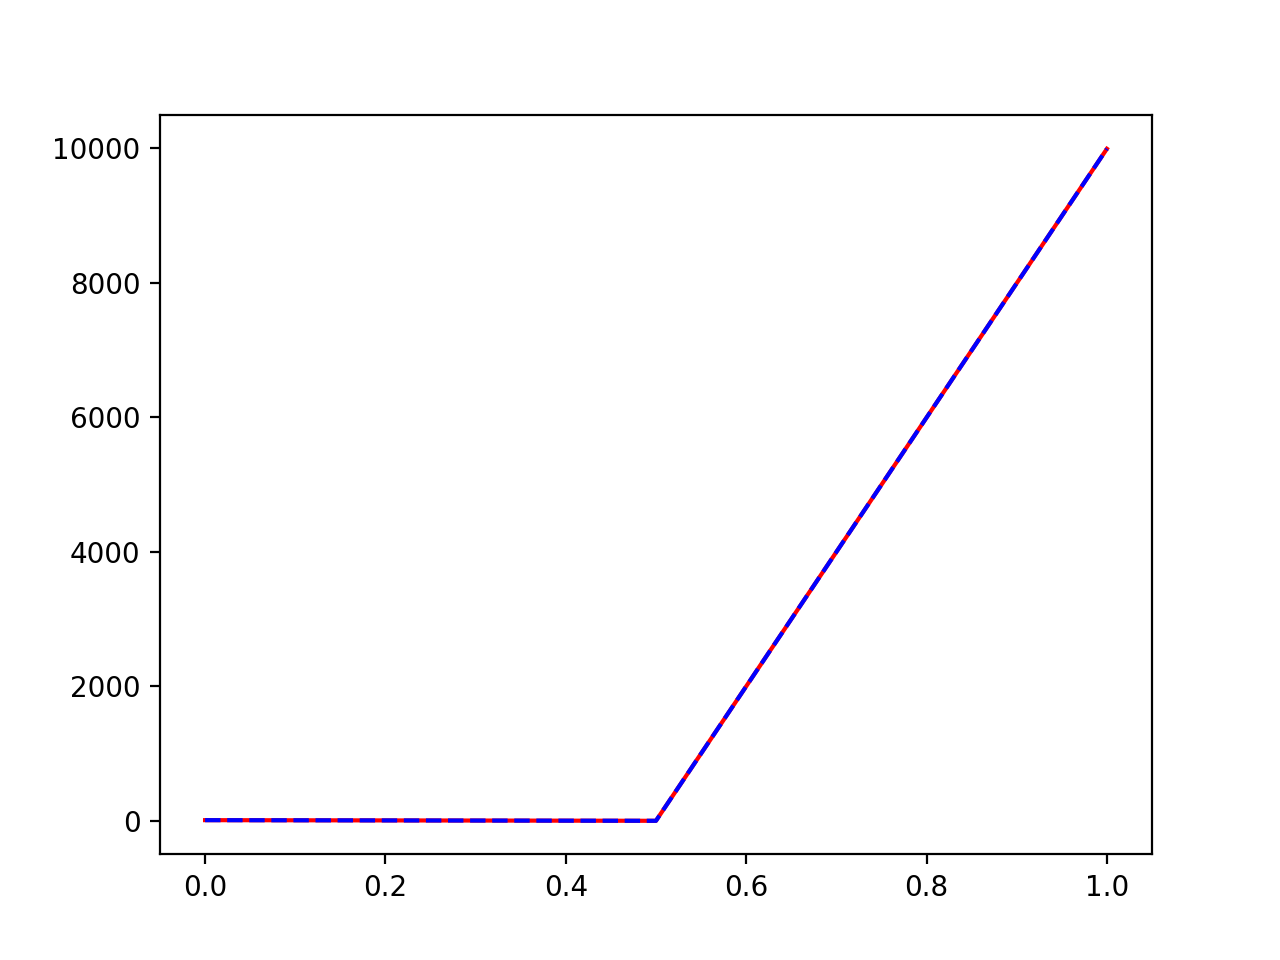

In [48]:
x = [0.0001,0.5,1]

plot(x,F,'r')
plot(x,g,'b--')